In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [2]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
print(digits.target[0])

0


In [4]:
print('전체 샘플의 수 :{}'.format(len(digits.images)))

전체 샘플의 수 :1797


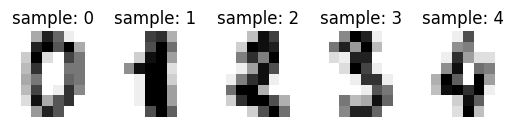

In [5]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image,label) in enumerate(images_and_labels[:5]):
  plt.subplot(2,5,index+1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('sample: %i' % label)

In [6]:
for i in range(5):
  print(i,'번 이덱스 샘플의 레이블 : ', digits.target[i])

0 번 이덱스 샘플의 레이블 :  0
1 번 이덱스 샘플의 레이블 :  1
2 번 이덱스 샘플의 레이블 :  2
3 번 이덱스 샘플의 레이블 :  3
4 번 이덱스 샘플의 레이블 :  4


In [7]:
X = digits.data
Y = digits.target

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [9]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [10]:
X = torch.tensor(X, dtype= torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [11]:
loss_fn = nn.CrossEntropyLoss()

In [12]:
optimizer = optim.Adam(model.parameters())

In [13]:
losses = []

In [14]:
for epoch in range(100):
  y_pred = model(X)
  loss = loss_fn(y_pred, Y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, 100, loss.item()))

  losses.append(loss.item())

Epoch    0/100 Cost: 2.409723
Epoch   10/100 Cost: 2.095965
Epoch   20/100 Cost: 1.841772
Epoch   30/100 Cost: 1.575574
Epoch   40/100 Cost: 1.294761
Epoch   50/100 Cost: 1.001884
Epoch   60/100 Cost: 0.719277
Epoch   70/100 Cost: 0.498204
Epoch   80/100 Cost: 0.353453
Epoch   90/100 Cost: 0.264466


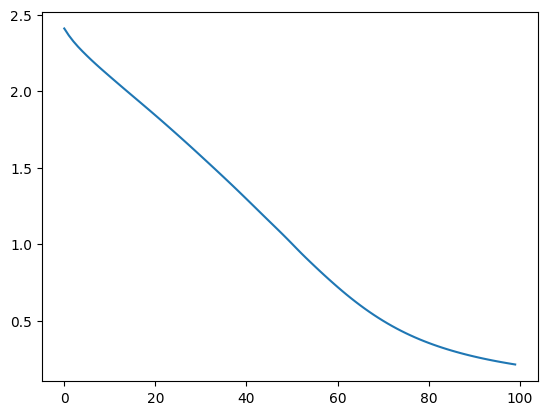

In [15]:
plt.plot(losses)